In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#Data cleaned in previous Jupyter-Notebook. Data pulled as CSV here
rawData = pd.read_csv('credit_2.csv')
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Check Data types for all columns in the dataframe
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   LIMIT_BAL       30000 non-null  int64
 2   SEX             30000 non-null  int64
 3   EDUCATION       30000 non-null  int64
 4   MARRIAGE        30000 non-null  int64
 5   AGE             30000 non-null  int64
 6   PAY_1           30000 non-null  int64
 7   PAY_2           30000 non-null  int64
 8   PAY_3           30000 non-null  int64
 9   PAY_4           30000 non-null  int64
 10  PAY_5           30000 non-null  int64
 11  PAY_6           30000 non-null  int64
 12  BILL_AMT1       30000 non-null  int64
 13  BILL_AMT2       30000 non-null  int64
 14  BILL_AMT3       30000 non-null  int64
 15  BILL_AMT4       30000 non-null  int64
 16  BILL_AMT5       30000 non-null  int64
 17  BILL_AMT6       30000 non-null  int64
 18  PAY_AMT1        30000 non-

# Limit Balance Regression Predictive Modeling

Regression Predictive Modeling is going to be used for here for predicting Limit Balance, which is a continous data column. Based on the EDA, it was found that the features that help with this predict was the PAY columns, as they have the strongest correlation with the Limit Balance column. Bill Amt columns also had strong correlations with Limit Balance.

### PAY & Limit Balance Regression

In [4]:
#Selecting Features for Prediction Model
#Using PAY Columns first
X = rawData[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [5]:
#Setting Limit Balance as Dependent Variable
y = rawData['LIMIT_BAL']

#### Cross Validation for Choosing the Right Model

In [6]:
#Checking and Practicing Cross Val Score Check for Linear Regression Model
model = LinearRegression(n_jobs=10)
print(cross_val_score(model, X, y, cv=3)) 

[0.09160873 0.1131427  0.10113375]


In [7]:
#Setting Up Cross Val Check for Multiple Regression Algorithm's to Find Which Estimator Performs Best
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [8]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [9]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.1051531496353189
Linear Regression 0.101961724682885
Support Vector Regression -0.050732632640690355


#### Train/Test Split Data

In [10]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [11]:
#Modeling (Classification), Choosing Random Forest Regressor Since It Has Best Cross Val Score
algo = RandomForestRegressor(max_depth=10)
model = algo.fit(X_train,y_train)

#### Predictions

In [12]:
#Make Predictions for Limit Bal Dependent Variable with PAY Columns
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.119
RMSE: 120763.445


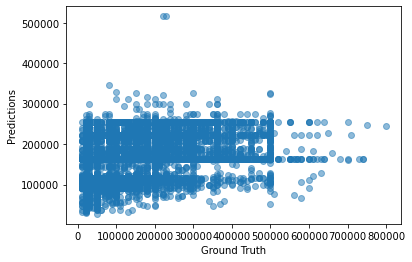

In [13]:
#Plotting the Known Values in the Test Set (Y_test) and the Predictions Made By the Model
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### BILL_AMT & Limit Balance Regression

In [14]:
#Selecting Features for Prediction Model
#Using BILL_AMT Columns
X = rawData[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [15]:
#dependent variable with Limit Balance
y = rawData['LIMIT_BAL']

#### Cross Validation for Choosing the Right Model

In [16]:
#Checking and Practicing Cross Val Score Check for Linear Regression Model
model = LinearRegression(n_jobs=10)
print(cross_val_score(model, X, y, cv=3)) 

[0.08816504 0.09141161 0.08768244]


In [17]:
#Setting Up Cross Val Check for Multiple Regression Algorithm's to Find Which Estimator Performs Best
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [18]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [19]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.3273567503044775
Linear Regression 0.08908636572117239
Support Vector Regression -0.05056783450893102


#### Train/Test Split Data

In [20]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [21]:
#Modeling (Classification), Choosing Random Forest Regressor Since It Has Best Cross Val Score
algo = RandomForestRegressor(max_depth=10)
model = algo.fit(X_train,y_train)

#### Predictions

In [22]:
#Make Predictions for Limit Bal Dependent Variable with BILL_AMT Columns
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.306
RMSE: 107177.677


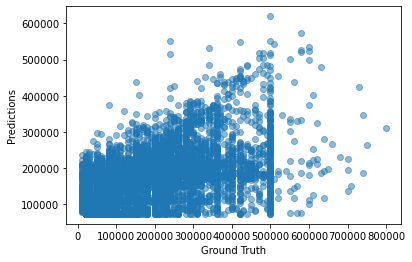

In [23]:
#Plotting the Known Values in the Test Set (Y_test) and the Predictions Made By the Model
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### LIMIT_BAL Regression Predictive Modeling Results

- R Squared is a measure on how well the linear regression model fits the dataset. From a range of 0 to 1, a value of R^2 that is close to 0 indicates that it is not a good predictor variable. Using PAY columns as the features in this model results with an R^2 of 0.119, while using BILL_AMT columns as the features in this model results with an R^2 of 0.305. Neither of these are very large R^2 values.
- Root Mean Square Error (RMSE) is a technique that informs us the average distance between the predicted values from the model and the dependent variable values in the dataset. The lower the RMSE, the better the prediction model fit is. When using the PAY Columns as the features in the model, the RMSE value is . When using the BILL_AMT columns as the features in this model, the RMSE value is . Despite  being lower than  , the RMSE values are still very high and do not fit the regression model very well.
- Both R^2 and RMSE values show that the regression model is not a good fit for predicting the LIMIT_BAL with the data provided. I will try an alternative by discretizing the LIMIT_BAL column into buckets. After discretizing the dependent variable, I will use the classification model and algorithms and check if this is a better way of predicting LIMIT_BAL.

# Limit Balance Classification Predictive Modeling

### Discretizing the Limit Balance for Classification Predictive Modeling

In [24]:
#Discretizing the Dependent Variable, LIMIT_BAL
#Only 3 Rows with Values above 800K, so putting this under the 700K+ Bin 
cut_labels = ['0-50K', '50K-100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', 
              '500K-600K', '600K-700K', '700K+']
cut_bins = (0, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 1000000)
LimBalCutData = rawData.copy()
LimBalCutData['LIM_BAL_CUT'] = pd.cut(rawData['LIMIT_BAL'], bins=cut_bins, labels=cut_labels)
LimBalCutData.drop('LIMIT_BAL', axis=1, inplace=True)
LimBalCutData

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS,LIM_BAL_CUT
0,1,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,0-50K
1,2,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,100K-200K
2,3,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,50K-100K
3,4,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0-50K
4,5,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0-50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,3,1,39,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,200K-300K
29996,29997,1,3,2,43,-1,-1,-1,-1,0,...,5190,0,1837,3526,8998,129,0,0,0,100K-200K
29997,29998,1,2,2,37,4,3,2,-1,0,...,20582,19357,0,0,22000,4200,2000,3100,1,0-50K
29998,29999,1,3,1,41,1,-1,0,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,50K-100K


In [25]:
#Checking Data Types for all Columns in New Dataframe
LimBalCutData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              30000 non-null  int64   
 1   SEX             30000 non-null  int64   
 2   EDUCATION       30000 non-null  int64   
 3   MARRIAGE        30000 non-null  int64   
 4   AGE             30000 non-null  int64   
 5   PAY_1           30000 non-null  int64   
 6   PAY_2           30000 non-null  int64   
 7   PAY_3           30000 non-null  int64   
 8   PAY_4           30000 non-null  int64   
 9   PAY_5           30000 non-null  int64   
 10  PAY_6           30000 non-null  int64   
 11  BILL_AMT1       30000 non-null  int64   
 12  BILL_AMT2       30000 non-null  int64   
 13  BILL_AMT3       30000 non-null  int64   
 14  BILL_AMT4       30000 non-null  int64   
 15  BILL_AMT5       30000 non-null  int64   
 16  BILL_AMT6       30000 non-null  int64   
 17  PAY_AMT1    

### PAY Features and Discretized LIMIT_BAL Dependent Variable

In [26]:
#Using PAY Columns first
X = LimBalCutData[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [27]:
#Setting Limit Balance Cut Column as Dependent Variable
y = LimBalCutData['LIM_BAL_CUT']

#### Cross Validation for Choosing the Right Model

In [28]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [29]:
model = DecisionTreeClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.3078 0.3101 0.3091]


In [30]:
#Setting Up Cross Val Check for Multiple Classification Algorithm's to Find Which Estimator Performs Best
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Tree Classifier', GradientBoostingClassifier()))

In [31]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [32]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.309
Decision Tree Classifier 0.309
Gradient Tree Classifier 0.31983333333333336


The Gradient Tree Classifier shows the highest score, so I will use it for the prediction.

#### Predictions

In [33]:
#Modeling (Classification)
algo = GradientBoostingClassifier(max_depth=10)
model = algo.fit(X_train,y_train)

In [34]:
#Predictions
preds = model.predict(X_test)
print(classification_report(y_test,preds, zero_division=1))

              precision    recall  f1-score   support

       0-50K       0.40      0.45      0.42      2301
   100K-200K       0.28      0.59      0.38      2364
   200K-300K       0.25      0.18      0.21      1567
   300K-400K       0.12      0.01      0.01       764
   400K-500K       0.12      0.01      0.02       472
   500K-600K       0.00      0.00      0.00        40
    50K-100K       0.22      0.02      0.04      1468
   600K-700K       0.00      0.00      0.00        18
       700K+       0.00      0.00      0.00         6

    accuracy                           0.31      9000
   macro avg       0.15      0.14      0.12      9000
weighted avg       0.27      0.31      0.25      9000



The accuracy is 30% when LIMIT_BAL is discretized and the data set was ran through a Classification predicitive model. This was used with PAY as the features. I would like to try this again but with BILL_AMT.

#### Feature Importance Test

In [35]:
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [36]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.17907
Feature: 1, Score: 0.35709
Feature: 2, Score: 0.10910
Feature: 3, Score: 0.10995
Feature: 4, Score: 0.09669
Feature: 5, Score: 0.14810


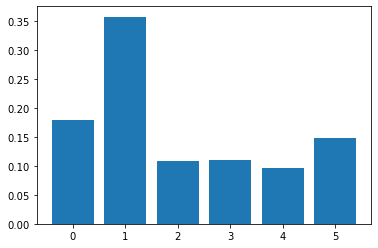

In [37]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### BILL_AMT Features and Discretized LIMIT_BAL Dependent Variable

In [38]:
#Using BILL_AMT Columns
X = LimBalCutData[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [39]:
#Setting Limit Balance Cut Column as Dependent Variable
y = LimBalCutData['LIM_BAL_CUT']

#### Cross Validation for Choosing the Right Model

In [40]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [41]:
model = DecisionTreeClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.3742 0.3865 0.3719]


In [42]:
#Setting Up Cross Val Check for Multiple Classification Algorithm's to Find Which Estimator Performs Best
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Tree Classifier', GradientBoostingClassifier()))

In [43]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [44]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.47150000000000003
Decision Tree Classifier 0.37906666666666666
Gradient Tree Classifier 0.4826


The Gradient Tree Classifier shows the highest score once again, so I will use it for the prediction.

#### Predictions

In [45]:
#Modeling (Classification)
algo = GradientBoostingClassifier(max_depth=10)
model = algo.fit(X_train,y_train)

In [46]:
#Predictions
preds = model.predict(X_test)
print(classification_report(y_test,preds, zero_division=1))

              precision    recall  f1-score   support

       0-50K       0.64      0.77      0.70      2301
   100K-200K       0.41      0.56      0.48      2364
   200K-300K       0.33      0.24      0.28      1567
   300K-400K       0.29      0.13      0.18       764
   400K-500K       0.30      0.11      0.16       472
   500K-600K       0.04      0.05      0.05        40
    50K-100K       0.49      0.42      0.45      1468
   600K-700K       0.00      0.00      0.00        18
       700K+       0.00      0.00      0.00         6

    accuracy                           0.47      9000
   macro avg       0.28      0.25      0.26      9000
weighted avg       0.45      0.47      0.45      9000



The accuracy is 48% when LIMIT_BAL is discretized and BILL_AMT columns are used as the features. This an 18% increase from the model using PAY columns as features.

#### Feature Importance Test

In [47]:
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [48]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.28358
Feature: 1, Score: 0.19540
Feature: 2, Score: 0.11754
Feature: 3, Score: 0.11494
Feature: 4, Score: 0.12096
Feature: 5, Score: 0.16757


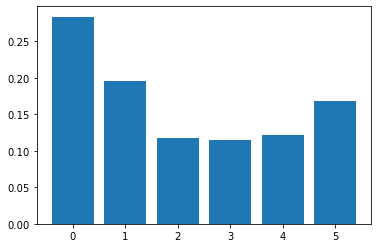

In [49]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### LIMIT_BAL Classification Predictive Modeling Results

- I discretized LIMIT_BAL into multiple bins to set up the dependent variable for the Classification predicitive model
- Using the PAY columns as the features, the accuracy for predicting LIMIT_BAL with the Gradient Tree Classifier algorithm is 30%. Using the BILL_AMT columns as features, the accuracy for predicting LIMIT_BAL with the Gradient Tree Classifier algorithm is 48%.
- Using BILL_AMT as features increases the accuracy. However, 48% is a low predicition accuracy value, and it isn't any better than simply flipping a coin. While it seems that using classification preditive modeling improves the prediction accuracy, it can be safe to say that it isn't really possible to predict the Limit Balance for a customer.
- Being that LIMIT_BALANCE is not really predictable, we should focus on being able to predict if a customer is likely to default or not. As stated previously for CreditOne, the ability to check if a user should be approved or not based on their likelihood of defaulting will help remove the risk of losing business from defaulting customers.

# Default Status Classification Predictive Modeling

DEFAULT_STATUS only has two possible values: 1 or 0. 1 indicates a user has defaulted, while 0 indicates they have not. Being that it only has two possible values, it can be safe to say that this needs a classification machine learning model. During the EDA, it was found that the PAY columns had the best relationship with DEFAULT_STATUS compared to the other possible features available. I will use the PAY columns as the Features and the DEFAULT_STATUS as the dependent variable.

In [50]:
#Using PAY columns as features from rawData Dataframe
X = rawData[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [51]:
#Setting Default Status Column as Dependent Variable
y = rawData['DEFAULT_STATUS']

#### Cross Validation for Choosing the Right Model

In [52]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [53]:
model = DecisionTreeClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.8061 0.8189 0.8187]


In [54]:
#Setting Up Cross Val Check for Multiple Classification Algorithm's to Find Which Estimator Performs Best
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Tree Classifier', GradientBoostingClassifier()))

In [55]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [56]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8144
Decision Tree Classifier 0.8146
Gradient Tree Classifier 0.8207666666666666


The Gradient Tree Classifier shows the highest score once again, so I will use it for the prediction.

#### Predictions

In [57]:
#Modeling (Classification)
algo = GradientBoostingClassifier(max_depth=10)
model = algo.fit(X_train,y_train)

In [58]:
#Predictions
preds = model.predict(X_test)
print(classification_report(y_test,preds, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7052
           1       0.63      0.37      0.46      1948

    accuracy                           0.82      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



- The accuracy is 82% when predicting the DEFAULT_STATUS with GradientBoostingClassifier model. This is very high and promising!
- When the model predicts a user will default (1), it is correct 63% of the time. When it predicts a user will not default (0), it is correct 84% of the time.
- The model has 94% recall of 0, meaning that it correctly identifies 94% of all users who did not default. The model has a 37% recall of 1, meaning that it correctly identifies 37% of users who did default.

#### Feature Importance Test

In [59]:
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [60]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.64820
Feature: 1, Score: 0.14589
Feature: 2, Score: 0.04628
Feature: 3, Score: 0.06049
Feature: 4, Score: 0.04307
Feature: 5, Score: 0.05607


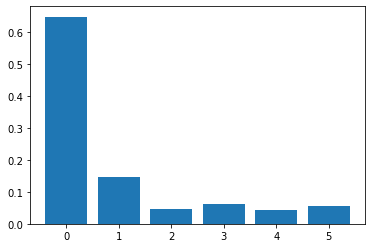

In [61]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Default Status Classification Predictive Modeling Results

- Predicting LIMIT_BAL is not exactly possible, so I decided that it was best to set up a model that can predict if a customer is likely to default or not.
- The prediction accuracy of the Gradient Boosting Classifier model is 84%, which is very high. It is safe to say that is possible to predict a user's likelihood to default. The features used for the prediction are the PAY columns, which indicate what the user did during the pay period. The very first pay period (PAY_1) has the highest feature importance when using this prediction model.